In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# carregando os dados

In [2]:
#carrega o dataset
df = pd.read_csv('dataset.csv')

In [3]:
df.shape

(500, 2)

In [4]:
df.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# análise exploratória - Resumo estatístico

In [6]:
#verifica se há valores ausentes
df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [7]:
#correlação
df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [8]:
#resumo estatístico do dataset
df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [9]:
#resumo estatístico da variável preditora
df['horas_estudo_mes'].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

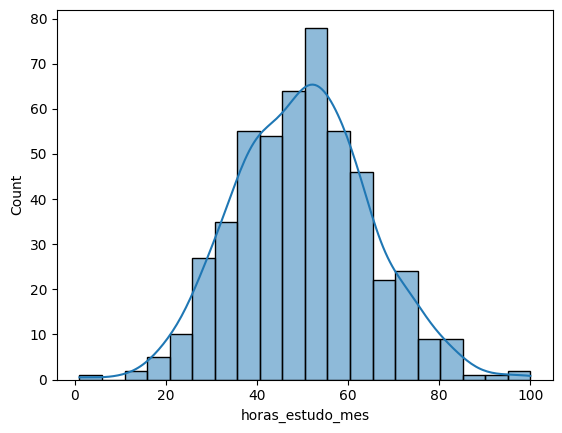

In [10]:
#histograma da variável preditora
sns.histplot(data = df, x = "horas_estudo_mes", kde = True)

# preparação dos dados

In [11]:
#prepara a variável de entrada x
x = np.array(df['horas_estudo_mes'])

In [12]:
type(x)

numpy.ndarray

In [13]:
#ajusta o shape de x
x = x.reshape(-1,1)

In [14]:
#prepara a variável alvo (ou de saída, y)
y = df['salario']

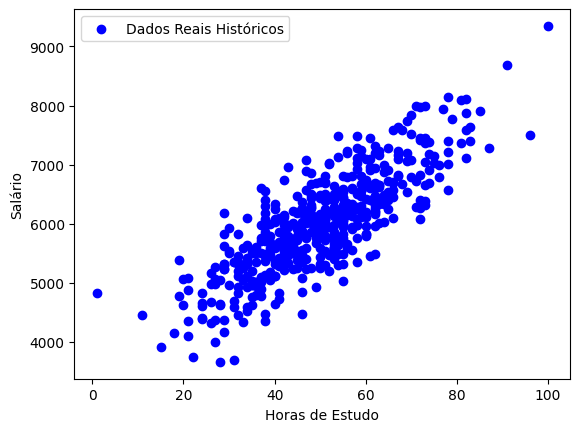

In [15]:
#gráfico de dispersão entre x e y
plt.scatter(x, y, color = 'blue', label = 'Dados Reais Históricos')
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [16]:
#dividir dados em treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state= 42)

In [17]:
x_treino.shape

(400, 1)

In [18]:
x_teste.shape

(100, 1)

In [19]:
y_treino.shape

(400,)

In [20]:
y_teste.shape

(100,)

## Modelagem Preditiva (Machine Learning)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [21]:
#cria o modelo de regressão linear simples
modelo = LinearRegression()

In [22]:
#treina o modelo
modelo.fit(x_treino, y_treino)

LinearRegression()

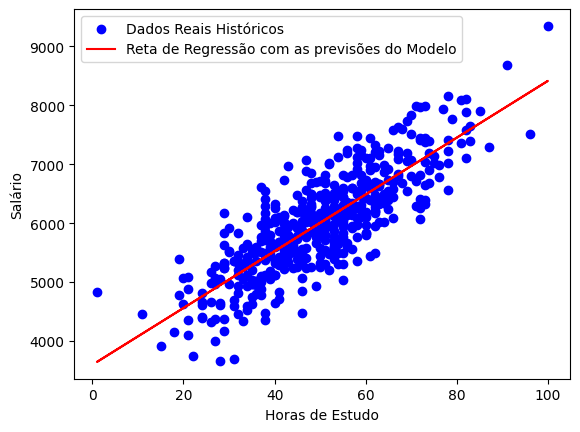

In [23]:
#visualiza a reta de regressão linear (previsões) e os dados reais usados no treinamento
plt.scatter(x,y, color = 'blue', label = 'Dados Reais Históricos')
plt.plot(x, modelo.predict(x), color = 'red', label = 'Reta de Regressão com as previsões do Modelo')
plt.xlabel('Horas de Estudo')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [28]:
#avalia o modelo nos dados de teste
score = modelo.score(x_teste, y_teste)
print(f"Coeficiente R^2:{score: 2f}")

Coeficiente R^2: 0.593933


In [30]:
#intercepto - parâmetro w0
modelo.intercept_

3596.783724372753

In [31]:
#slope - parâmetro w1
modelo.coef_

array([48.18185277])

(imagem no capítulo 15 da DSA)

## Deploy do Modelo
Usaremos o modelo para prever o salário com base nas horas de estudo.

In [32]:
#define um novo valor para horas de estudo
horas_estudo_novo = np.array([[48]])

#faz presivão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[48]] horas por mês seu salário pode ser igual a [5909.5126574]


In [34]:
#mesmo resultado anterior usando os parâmetros (coeficientes) aprendidos pelo modelo
#y_novo = w0 + w1 * x
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
print(salario)

[[5909.5126574]]


In [35]:
#define um novo valor para horas de estudo
horas_estudo_novo = np.array([[65]])

#faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerda de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerda de [[65]] horas por mês seu salário pode ser igual a [6728.60415452]


In [36]:
#define um novo valor para horas de estudo
horas_estudo_novo = np.array([[73]])

#faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerda de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerda de [[73]] horas por mês seu salário pode ser igual a [7114.05897669]


# Finalizado